In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [162]:
df = pd.read_csv("cc_data_jobrecoded07_12.csv",dtype=str)
# We need to NOT load numbers as floats, 2000 is not the same code as 2000.0
# pandas reads in blank cells as NaN. This is useful.

In [171]:
# Get rid of the date columns
def extract_date_cols(df):
    date_inds = []
    for i in range(len(df.columns)):
        label = df.columns[i]
        if ('s' in label or 'e' in label) and ('job' in label):
            date_inds.append(i)
    cleaned = df.drop(df.columns[date_inds],axis=1)
    date_cols = df[date_inds]
    return cleaned,date_cols

In [172]:
# Career sequences (with dates)
jobs = df.ix[:,48:]
jobs,date_cols = extract_date_cols(jobs)

In [209]:
dates = date_cols.values.flatten()

In [210]:
dates = [date for date in dates if date == date]

In [212]:
sorted(set(dates))

[' ',
 '11972',
 '11978',
 '1921',
 '1922',
 '1923',
 '1924',
 '1925',
 '1926',
 '1927',
 '1928',
 '1929',
 '1930',
 '1931',
 '1932',
 '1933',
 '1934',
 '1935',
 '1936',
 '1937',
 '1938',
 '1939',
 '1940',
 '1941',
 '1942',
 '1943',
 '1944',
 '1945',
 '1946',
 '1947',
 '1948',
 '1949',
 '1950',
 '1951',
 '1952',
 '1953',
 '1954',
 '1955',
 '1956',
 '1957',
 '1958',
 '1959',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2012',
 '2013',
 '2507']

In [219]:
date_cols[date_cols == '2507'].index[0]

0

What's up with the ranks?

In [6]:
ranks = df.ix[:,38:43]
rank_values = list(set(ranks.values.flatten()))

In [7]:
rank_values = list(set(ranks.values.flatten()))

In [8]:
rank_values = rank_values[1:]
rank_values.remove(' ')
rank_values = [float(x) for x in rank_values]

In [9]:
rank_values = sorted(rank_values)


In [10]:
test = '2048'
test[:3]

'204'

In [167]:
date_cols

Index([u'job1s', u'job1e', u'job2s', u'job2e', u'job3s', u'job3e', u'job4s', u'job4e', u'job5s', u'job5e', u'job6s', u'job6e', u'job7s', u'job7e', u'job8s', u'job8e', u'job9s', u'job9e', u'job10s', u'job10e', u'job11s', u'job11e', u'job12s', u'job12e', u'job13s', u'job13e', u'job14s', u'job14e', u'job15s', u'job15e', u'job16s', u'job16e', u'job17s', u'job17e', u'job18s', u'job18e', u'job19s', u'job19e', u'job20s', u'job20e', u'job21s', u'job21e', u'job22s', u'job22e', u'job23s', u'job23e', u'job24s', u'job24e', u'job25s', u'job25e', u'job26s', u'job26e', u'job27s', u'job27e'], dtype='object')

Implementing our recoding/categorization scheme:

In [12]:
regions = {   'B1':['208','209','210','211','212','214'],
              'B2':['205','206','207'],
              'B3':['200','201','202','203','204'],
              'B4':['218','219','220'],
              'B5':['213','215','216','217'],
              'B6':['226','227','228','229','230'],
              'B7':['221','222','223','224','225']}
def recoder(job_code):
    if job_code != job_code: # If it is a NaN
        return 'Y'
    if float(job_code) < 100:
        return 'A1'
    if job_code[0] == '6':
        return 'A1'
    if job_code[0] == '1':
        return 'A2'
    if job_code[0] == '4':
        return 'A3'
    if job_code[0] == '5':
        return 'A4'
    if job_code[0] == '3':
        return 'C'
    if job_code[:2] == '25':
        return 'B8'
    if job_code[0] == '2':
        
        prov = job_code[:3]
        for region in regions.keys():
            if prov in regions[region]:
                return region

        print 'Failed to identify region for ' + job_code
        return 'Z'
    else:
        print "Couldn't classify " + job_code
        return 'Z'

In [13]:
# Remove from the pandas dataframe,
# convert to a simplistic list of lists of strings
trajectories = list([list(trajectory) for trajectory in jobs.values])

In [14]:
# Remove all NaNs from the end of the list,
# keeping NaNs at the beginning or end of the list
for traj in trajectories:
    for job in reversed(traj):
        if job != job: #(if it is a Nan)
            traj.pop()

In [15]:
recoded_trajs = []
for traj in trajectories:
    new_traj = []
    for job in traj:
        new_job = recoder(job)
        new_traj.append(new_job)
    recoded_trajs.append(new_traj)

Failed to identify region for 2457


In [16]:
recoded_trajs[328]

['B7', 'B6', 'B7', 'B7', 'A3', 'A1', 'A1', 'A1']

In [140]:
pickle.dump(recoded_trajs, open('recoded_trajs.p','w'))

Let's try and plot these career trajecteories:

In [201]:
codes = ['A1','A2','A3','A4','B1','B2','B3','B4','B5','B6','B7','B8','C','Y','Z']
code_names = ['CCP Official/A1','Bureaucracy/A2','Congress/A3',
              'Judicial/A4',
              'Eastern/B1',
              'NorthEast/B2',
              'North/B3',
              'South/B4',
              'Central/B5',
              'NorthWest/B6',
              'SouthWest/B7',
              'Prov. CCP Head/B8',
              'Military/C',
              'Outside gov/Y',
              'Unclassified/Z']
              
graph_codes = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
graph_map = dict(zip(codes,graph_codes))

In [122]:
def filter_by_codes(trajs,codes,operator):
    '''A filter to show trajectories that contain a given 
    combination of codes
    '''
    filtered = []
    for traj in trajs:
        if operator == 'and':
            # Return only trajectories containing all given codes
            if set(codes).intersection(set(traj)) == set(codes):
                filtered.append(traj)
        if operator == 'or':
            # Return trajectories containing any of the given codes
            if set(codes).intersection(set(traj)):
                filtered.append(traj)
        if operator == 'no':
            if not set(codes).intersection(set(traj)):
                filtered.append(traj)
        
    return filtered

In [123]:
# If we want, filter the trajectories:
#filter_trajs = filter_by_codes(recoded_trajs,['A1'],'or')
#filter_trajs = filter_by_codes(filter_trajs,['B3','B1'],'or')
#filter_trajs = filter_by_codes(recoded_trajs,['A1'],'no')

# If we are not doing any filtering:
filter_trajs = recoded_trajs

In [124]:
# Convert each career trajectory to a numerical sequence
# that matplotlib can plot.
graph_trajs = []
for traj in filter_trajs:
    graph_traj = []
    for code in traj:
        graph_traj.append(graph_map[code])
    graph_trajs.append(graph_traj)

In [136]:
# Load the cluster index lists:
clusters = pickle.load(open('clusters_v4_4.p','r'))

In [137]:
# Using the indices from the cluster lists, assemble lists of trajectories:
clustered_trajs = []
for cluster in clusters:
    trajs = []
    for traj_index in cluster:
        trajs.append(graph_trajs[traj_index])
    clustered_trajs.append(trajs)

In [138]:
len(clustered_trajs)

4

In [206]:
# Plot each trajectory

def plot_traj_group(traj_group,color,plotname):
    plt.figure()
    for traj in traj_group:
        plt.plot(range(len(traj)),traj,
            alpha=0.03,
            color=color,
            marker='o')

        # Set the x- and y-axis labels
    plt.xticks(np.arange(0,26,1.0))
    #plt.yticks(np.arange(1,16,1.0),codes,size=18)
    plt.yticks(np.arange(1,16,1.0),code_names,size=14)
    

    # Specifies the domain and range displayed
    plt.axis([0,25,0,15])

    #plt.gca().xaxis.grid(True)
    #plt.gca().yaxis.grid(True)

    fig = plt.gcf() # Returns the current figure instance
    fig.tight_layout()
    fig.set_size_inches(18, 7)
    fig.savefig(plotname,bbox_inches='tight')

"\nplot_traj_group(clustered_trajs[0],'k','v4_c9_1.png')\nplot_traj_group(clustered_trajs[1],'k','v4_c9_2.png')\nplot_traj_group(clustered_trajs[2],'k','v4_c9_3.png')\nplot_traj_group(clustered_trajs[3],'k','v4_c9_4.png')\nplot_traj_group(clustered_trajs[4],'k','v4_c9_5.png')\nplot_traj_group(clustered_trajs[5],'k','v4_c9_6.png')\nplot_traj_group(clustered_trajs[6],'k','v4_c9_7.png')\nplot_traj_group(clustered_trajs[7],'k','v4_c9_8.png')\nplot_traj_group(clustered_trajs[8],'k','v4_c9_9.png')\n"

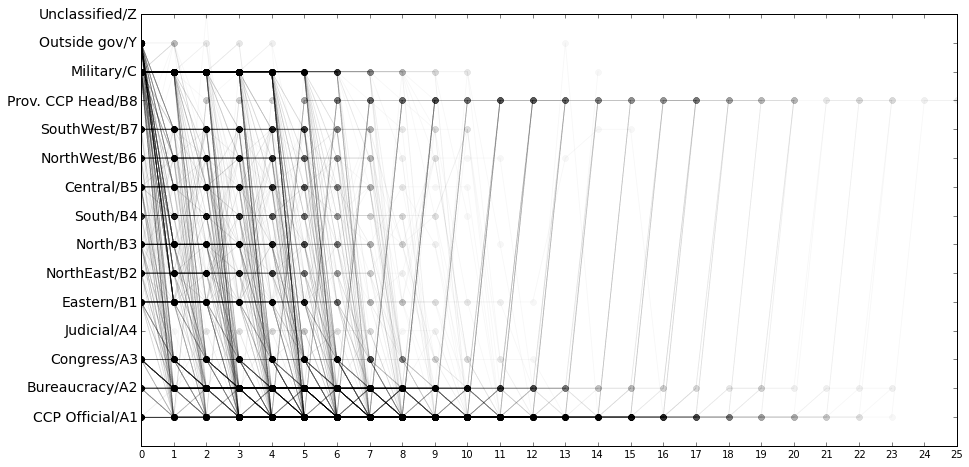

In [208]:
'''
plot_traj_group(clustered_trajs[0],'r','v4_c3_1.png')
plot_traj_group(clustered_trajs[1],'g','v4_c3_2.png')
plot_traj_group(clustered_trajs[2],'b','v4_c3_3.png')
'''

plot_traj_group(graph_trajs,'k','EntireDataset_names.png')
#plot_traj_group(graph_trajs,'k','EntireDataset.png')


'''
plot_traj_group(clustered_trajs[0],'r','v4_c4_names_1.png')
plot_traj_group(clustered_trajs[1],'g','v4_c4_names_2.png')
plot_traj_group(clustered_trajs[2],'b','v4_c4_names_3.png')
plot_traj_group(clustered_trajs[3],'m','v4_c4_names_4.png')
'''

'''
plot_traj_group(clustered_trajs[0],'r','v4_c4_1.png')
plot_traj_group(clustered_trajs[1],'g','v4_c4_2.png')
plot_traj_group(clustered_trajs[2],'b','v4_c4_3.png')
plot_traj_group(clustered_trajs[3],'m','v4_c4_4.png')
'''

'''
plot_traj_group(clustered_trajs[0],'r','v4_c5_1.png')
plot_traj_group(clustered_trajs[1],'g','v4_c5_2.png')
plot_traj_group(clustered_trajs[2],'b','v4_c5_3.png')
plot_traj_group(clustered_trajs[3],'m','v4_c5_4.png')
plot_traj_group(clustered_trajs[4],'c','v4_c5_5.png')
'''

'''
plot_traj_group(clustered_trajs[0],'k','v4_c9_1.png')
plot_traj_group(clustered_trajs[1],'k','v4_c9_2.png')
plot_traj_group(clustered_trajs[2],'k','v4_c9_3.png')
plot_traj_group(clustered_trajs[3],'k','v4_c9_4.png')
plot_traj_group(clustered_trajs[4],'k','v4_c9_5.png')
plot_traj_group(clustered_trajs[5],'k','v4_c9_6.png')
plot_traj_group(clustered_trajs[6],'k','v4_c9_7.png')
plot_traj_group(clustered_trajs[7],'k','v4_c9_8.png')
plot_traj_group(clustered_trajs[8],'k','v4_c9_9.png')
'''

In [161]:
mil_trajs = filter_by_codes(recoded_trajs,['C'],'and')
mil_prov = filter_by_codes(mil_trajs,['Y','B1','B2','B3','B4','B5','B6','B7'],'or')
mil_cent = filter_by_codes(mil_trajs,['Y','A1','A2','A3','A4'],'or')
mil_Y = filter_by_codes(mil_trajs,['Y'],'or')

Bs = filter_by_codes(recoded_trajs,['B1','B2','B3','B4','B5','B6','B7'],'or')
B8s = filter_by_codes(recoded_trajs,['B8'],'or')

As = filter_by_codes(recoded_trajs,['A1','A2','A3','A4'],'or')
A3s = filter_by_codes(recoded_trajs,['A3'],'or')
Bs_and_As = filter_by_codes(Bs,['A1','A2','A3','A4'],'or')

print(len(mil_trajs))
print(len(mil_prov))
print(len(mil_cent))
print(len(mil_Y))

print(len(As))
print(len(Bs))
print(len(A3s))
print(len(B8s))
print(len(Bs_and_As))


552
268
552
12
1564
1034
582
233
1002
